In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def load_dataset(path):
    """Return the dataset at given path after having removed the metrics deemed useless (motivation in documentation)."""
    return pd.read_csv(
        path, sep='\t').drop(
            columns=["CpGobsExp", "CpGperCpG", "dbVARCount", "mamPhyloP46way"])

In [ ]:
TRAINING_DATASET_PATH = "Mendelian.train.tsv"
TESTING_DATASET_PATH = "Mendelian.test.tsv"

In [ ]:
training = load_dataset(TRAINING_DATASET_PATH)

In [ ]:
testing = load_dataset(TESTING_DATASET_PATH)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(training)

In [4]:
scaled_training_dataframe = scaler.transform(training)
scaled_testing_dataframe = scaler.transform(testing)
scaled_mixed_dataframe = scaler.transform(testing.append(training))

In [5]:
TRAINING_DATA = 981388
TESTING_DATA = 19018

In [6]:
TRAINING_POSITIVES_NUMBER = 356
TESTING_POSITIVES_NUMBER = 40

In [7]:
training_labels = np.full((TRAINING_DATA),4)
training_labels[:TRAINING_POSITIVES_NUMBER] = np.full((TRAINING_POSITIVES_NUMBER), 3)

testing_labels = np.full((TESTING_DATA), 2)
testing_labels[:TESTING_POSITIVES_NUMBER] = np.full((TESTING_POSITIVES_NUMBER), 1)

mixed_labels = np.zeros((TESTING_DATA+TRAINING_DATA))
mixed_labels[:TESTING_POSITIVES_NUMBER] = np.ones((TESTING_POSITIVES_NUMBER))
mixed_labels[TESTING_POSITIVES_NUMBER:TESTING_DATA] = np.full((TESTING_DATA-TESTING_POSITIVES_NUMBER), 2)
mixed_labels[TESTING_DATA:TESTING_DATA+TRAINING_POSITIVES_NUMBER] = np.full((TRAINING_POSITIVES_NUMBER), 3)
mixed_labels[TESTING_DATA+TRAINING_POSITIVES_NUMBER:] = np.full((TRAINING_DATA-TRAINING_POSITIVES_NUMBER), 4)

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=1, method='barnes_hut', n_iter=1000, verbose=20)

In [16]:
testing_tsne = tsne.fit_transform(scaled_testing_dataframe)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 19018 samples in 0.598s...
[t-SNE] Computed neighbors for 19018 samples in 20.023s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19018
[t-SNE] Computed conditional probabilities for sample 2000 / 19018
[t-SNE] Computed conditional probabilities for sample 3000 / 19018
[t-SNE] Computed conditional probabilities for sample 4000 / 19018
[t-SNE] Computed conditional probabilities for sample 5000 / 19018
[t-SNE] Computed conditional probabilities for sample 6000 / 19018
[t-SNE] Computed conditional probabilities for sample 7000 / 19018
[t-SNE] Computed conditional probabilities for sample 8000 / 19018
[t-SNE] Computed conditional probabilities for sample 9000 / 19018
[t-SNE] Computed conditional probabilities for sample 10000 / 19018
[t-SNE] Computed conditional probabilities for sample 11000 / 19018
[t-SNE] Computed conditional probabilities for sample 12000 / 19018
[t-SNE] Computed conditional probabilities for sa

In [ ]:
training_tsne = tsne.fit_transform(scaled_training_dataframe)

In [ ]:
mixed_tsne = tsne.fit_transform(scaled_mixed_dataframe)

In [10]:
training_clustered = pd.concat(
    [
        pd.DataFrame(
            data=training_tsne,
            columns=['a', 'b']),
        pd.DataFrame(training_labels, columns=("target", ))
    ],
    axis=1)

In [17]:
testing_clustered = pd.concat(
    [
        pd.DataFrame(
            data=testing_tsne,
            columns=['a', 'b']),
        pd.DataFrame(testing_labels, columns=("target", ))
    ],
    axis=1)

In [ ]:
mixed_clustered = pd.concat(
    [
        pd.DataFrame(
            data=pca.fit_transform(scaled_mixed_dataframe),
            columns=['a', 'b']),
        pd.DataFrame(mixed_labels, columns=("target", ))
    ],
    axis=1)

In [19]:
def plot_cluster(cluster, title):
    plt.figure(figsize=(15, 15))
    plt.title('%s dataset 2 component TSNE' % title, fontsize=20)
    colors = ["red", "green", "blue", "orange", "purple"]
    targets = [0, 4, 2, 3, 1]
    for target, color in zip(targets, colors):
        indicesToKeep = cluster['target'] == target
        plt.scatter(
            cluster.loc[indicesToKeep, 'a'],
            cluster.loc[indicesToKeep, 'b'],
            alpha=0.7,
            c = color,
            s=50)
    plt.grid()
    plt.savefig("pca/%s"%title.lower())
    plt.show()

In [ ]:
plot_cluster(training_clustered, "Training")

In [ ]:
plot_cluster(mixed_clustered, "Mixed")

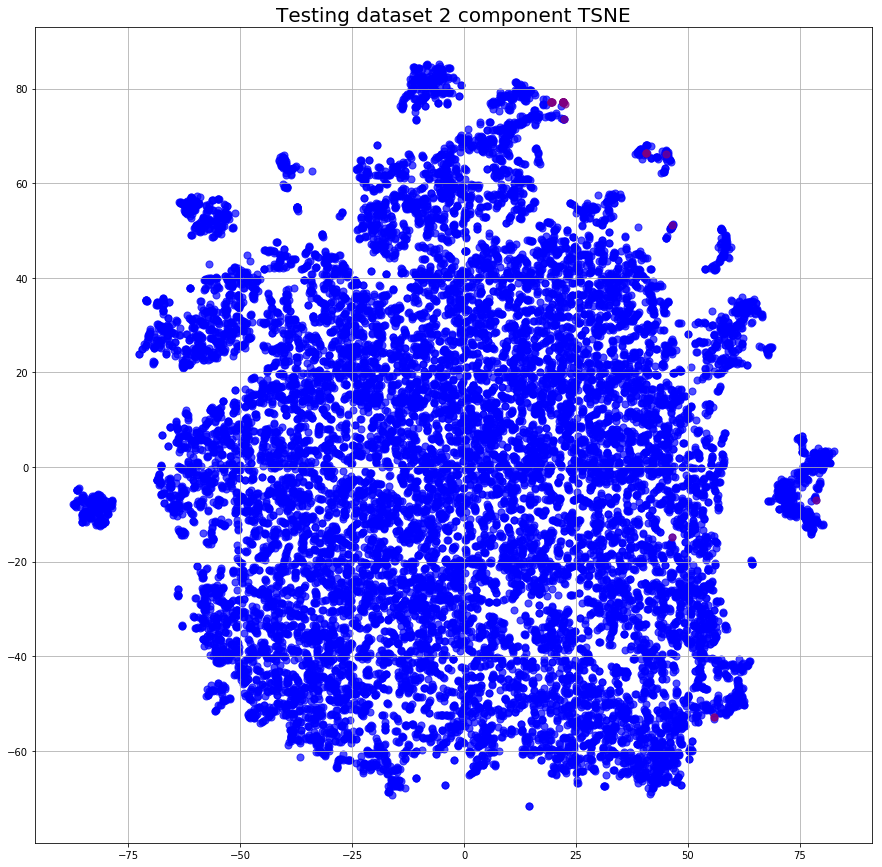

In [20]:
plot_cluster(testing_clustered, "Testing")